Question 1:
Using the World Bank Indicators, download data for “GDP per capita (current US$)” and “Prevalence of underweight, weight for age (% of children under 5)."
What kind of relationship do you expect? 
Make a scatter plot of malnutrition prevalence against GDP per capita (using all available years and countries). 
What kind of relationship do you see? Make a scatter plot for the geographical regions (six regions excluding North
America and use a different color for each).
Make a scatter plot for income levels (four income levels and use a different color for each).
Carefully label all graphs and provide legends.

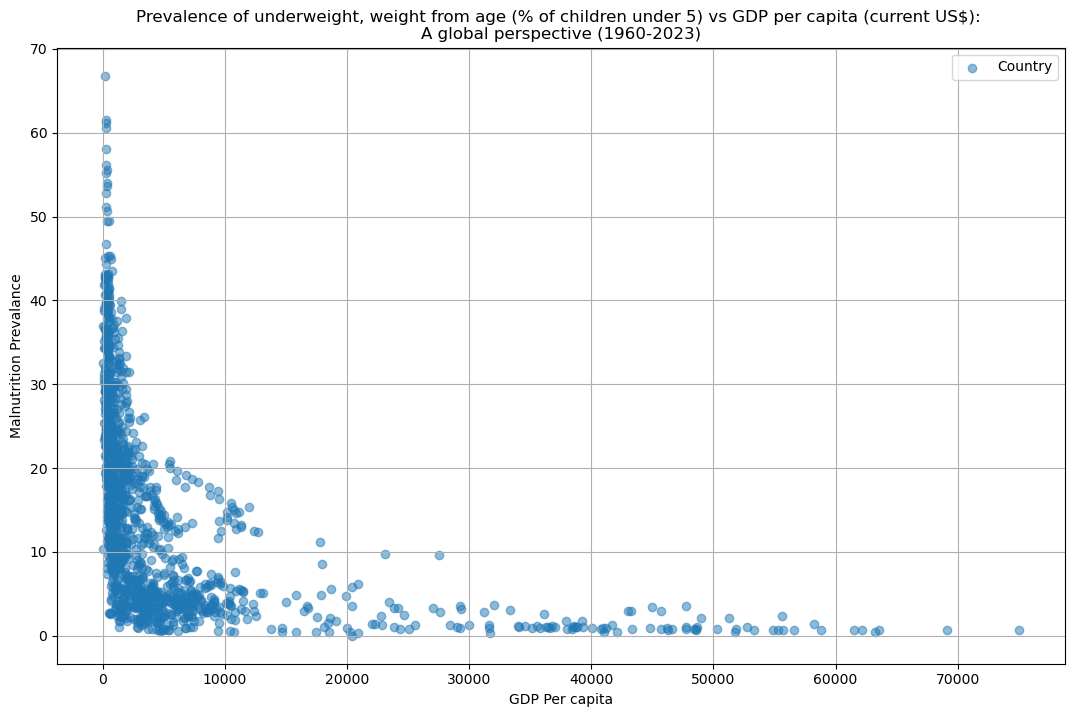

C:\Users\Mark Ahugari\AppData\Local\Temp\ipykernel_7900\2419297806.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  geo_colors = plt.cm.get_cmap('tab10', len(unique_geos))


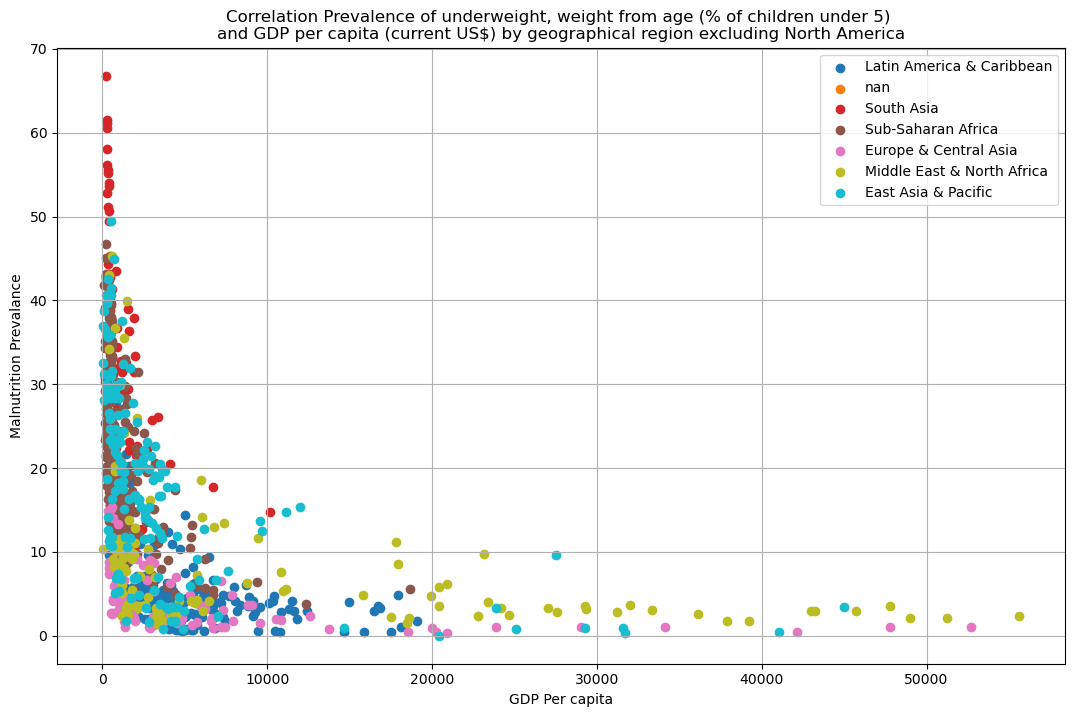

C:\Users\Mark Ahugari\AppData\Local\Temp\ipykernel_7900\2419297806.py:77: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  ilevel_colors = plt.cm.get_cmap('tab10', len(unique_ilevels))


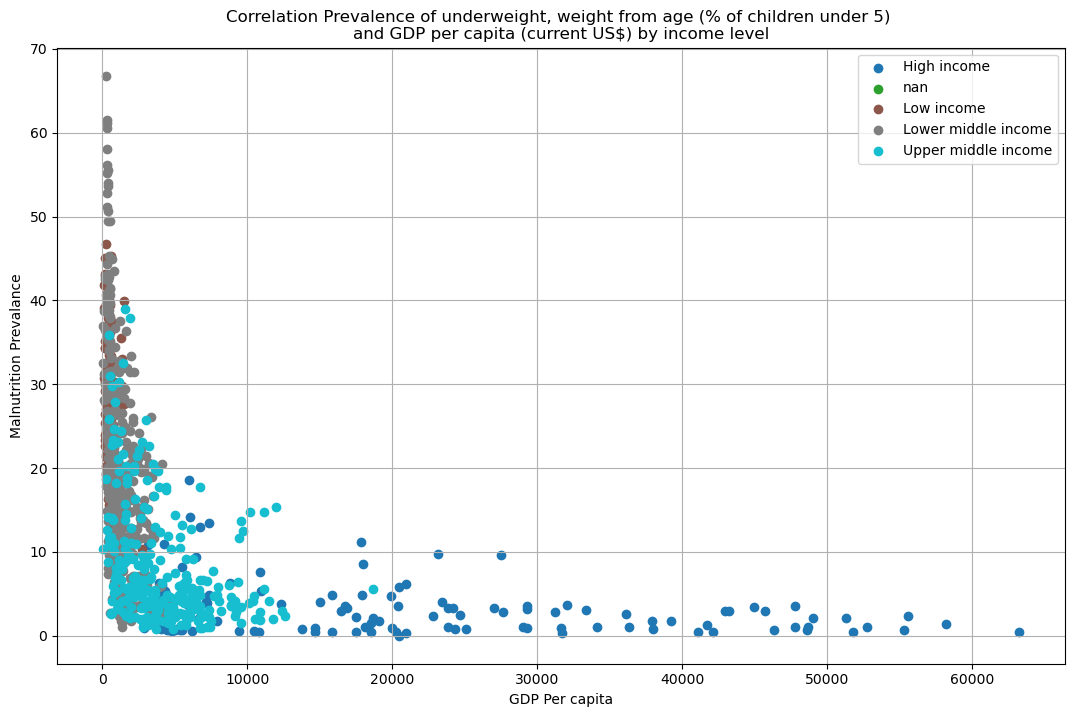

In [96]:
# to use read_excel function
import pandas as pd
# to plot and configure graphs
import matplotlib.pyplot as plt

# storing data from data source into respective data frames (both metadata and original data) 
gdp_data_df = pd.read_excel('data/GDP_per_capita.xls', sheet_name='Data', skiprows=3)
gdp_metad_df = pd.read_excel('data/GDP_per_capita.xls', sheet_name='Metadata - Countries', usecols="A,B,C")

mal_data_df = pd.read_excel('data/Prevalence_of_underweight,_weight_for_age.xls', sheet_name="Data", skiprows=3)
mal_metad_df = pd.read_excel('data/Prevalence_of_underweight,_weight_for_age.xls', sheet_name="Metadata - Countries", usecols="A,B,C")

# dropping the columns we don't need before we merge 
gdp_data_filtered = gdp_data_df.drop(columns=['Indicator Name', 'Country Name', 'Indicator Code'])
# translating the dataframe from wide to long format so we can carry out further analysis and plot graphs
gdp_long_data_df = gdp_data_filtered.melt(id_vars='Country Code', var_name="Year", value_name="gdp")


# droping the columns we don't need before we merge 
mal_data_filtered = mal_data_df.drop(columns=['Indicator Name', 'Country Name', 'Indicator Code'])
# translating the dataframe from wide to long format so we can carry out further analysis and plot graphs
mal_long_data_df = mal_data_filtered.melt(id_vars='Country Code', var_name='Year', value_name='mal')
# print(mal_long_data_df.tail())

# merging the long dataframe with the metadata so we can have key columns in the same dataframe before me merge them together
merged_gdp_df = pd.merge(gdp_long_data_df,gdp_metad_df, on='Country Code')
merged_mal_df = pd.merge(mal_long_data_df,mal_metad_df, on='Country Code')

# merging the two data frames on matching columns
merged_df = pd.merge(merged_gdp_df, merged_mal_df, on=['Country Code', 'Region', 'Year','IncomeGroup'])

# graph configuration
plt.figure(figsize=(13,8))
plt.scatter(merged_df['gdp'], merged_df['mal'], alpha=0.5, label="Country")
plt.legend()
plt.title("Prevalence of underweight, weight from age (% of children under 5) vs GDP per capita (current US$): \nA global perspective (1960-2023)")
plt.ylabel("Malnutrition Prevalance")
plt.xlabel("GDP Per capita")
plt.grid(True)
plt.show()




# filter the dataframe excluding the North American region 
geo_filtered_df = merged_df[~merged_df['Region'].isin(['North America'])]
# using color map to get us unique colors for the unique geographical locations
unique_geos = geo_filtered_df['Region'].unique()
geo_colors = plt.cm.get_cmap('tab10', len(unique_geos))
# get a unique color for each geographical location store it in a dictionary
geo_color_map = {geoloc: geo_colors(i) for i, geoloc in enumerate(unique_geos)}

# graph configuration
plt.figure(figsize=(13,8))
for geo_loc in unique_geos:
    # searching the main dataframe for the current geographical region
    geo_data = merged_df[merged_df['Region'] == geo_loc]
    # plot the geographical region on the graph
    plt.scatter(geo_data['gdp'], geo_data['mal'], color=geo_color_map[geo_loc],label=geo_loc )
plt.legend()
plt.title("Correlation Prevalence of underweight, weight from age (% of children under 5) \nand GDP per capita (current US$) by geographical region excluding North America")
plt.ylabel("Malnutrition Prevalance")
plt.xlabel("GDP Per capita")
plt.grid(True)
plt.show()


# using color map to get us unique colors for the unique income levels
unique_ilevels = merged_df['IncomeGroup'].unique()
# get a unique list of colors based on the number of unique income groups found
ilevel_colors = plt.cm.get_cmap('tab10', len(unique_ilevels))
# get a unique color for each income level store it in a dictionary
ilevel_color_map = {ilevel: ilevel_colors(i) for i, ilevel in enumerate(unique_ilevels)}

# graph configuration
plt.figure(figsize=(13,8))
for income_level in unique_ilevels:
    # searching the main dataframe for the current incomelevel
    ilevel_data = merged_df[merged_df['IncomeGroup'] == income_level]
    # plot the income level on the graph
    plt.scatter(ilevel_data['gdp'], ilevel_data['mal'], color=ilevel_color_map[income_level],label=income_level )
plt.legend()
plt.title("Correlation Prevalence of underweight, weight from age (% of children under 5) \nand GDP per capita (current US$) by income level")
plt.ylabel("Malnutrition Prevalance")
plt.xlabel("GDP Per capita")
plt.grid(True)
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.nasdaq.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.nasdaq.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.nasdaq.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


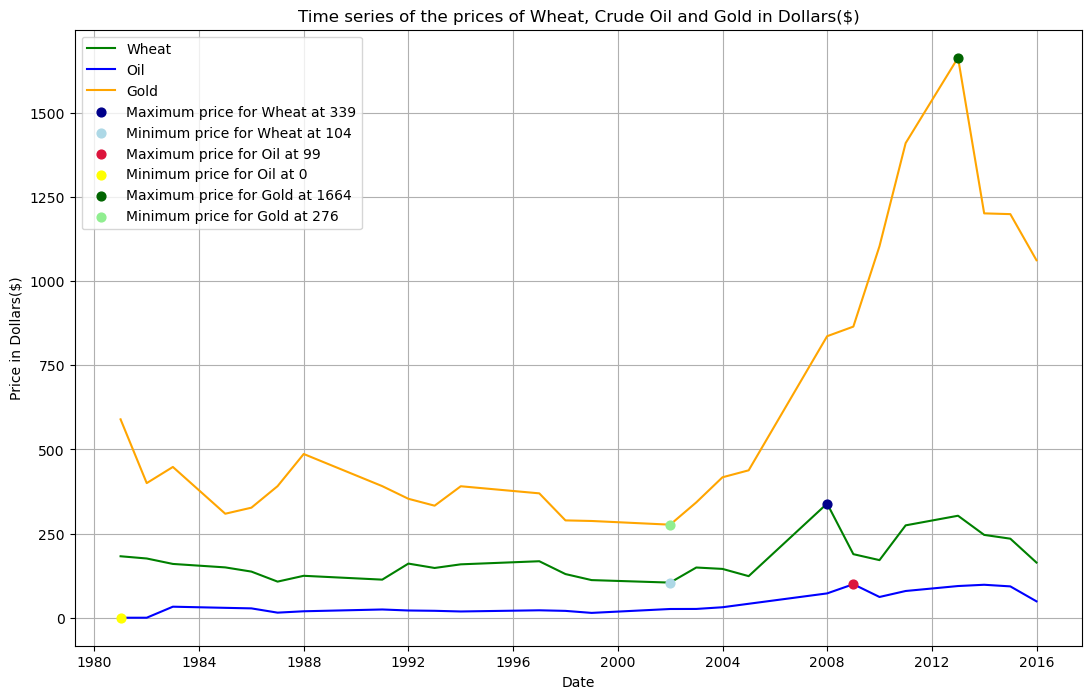

In [165]:
# to get datasets from quandl
import quandl as qdl
# to utilize the plot function 
import pandas as pd
# to plot and configure graphs
import matplotlib.pyplot as plt

# providing api key to allow connections to quandl
qdl.ApiConfig.api_key = 'HQ2ZhGd-MqudXq7ZYiGq'

# specifying the exact datasets to receive from quandl
wheat_prices = qdl.get('COM/PWHEAMT_USD')
oil_prices = qdl.get('WGEC/WLD_CRUDE_WTI')
gold_prices = qdl.get('BUNDESBANK/BBK01_WT5511')

# synchronizing the dates for the 3 datasets 
merged_prices = pd.merge(wheat_prices,oil_prices, on=['Date'],suffixes=('_wheat','_oil'))
merged_prices = pd.merge(merged_prices, gold_prices, on=['Date'])

# replacing the auto generated column names with clear ones
merged_prices.rename(columns={'Value_wheat': 'Wheat_price', 'Value_oil':'Oil_price', 'Value':'Gold_price'}, inplace=True)

# configuring the time series graph
plt.figure(figsize=(13,8))
plt.plot(merged_prices.index, merged_prices['Wheat_price'], label="Wheat", color="green")
plt.plot(merged_prices.index, merged_prices['Oil_price'], label="Oil", color="blue")
plt.plot(merged_prices.index, merged_prices['Gold_price'], label="Gold", color="Orange")

# minimum and maximum colors to uniquely identify the maximum and minimum points for wheat, oil and gold
colors = {
    'Wheat_price': ['lightblue','darkblue'],
    'Oil_price': ['yellow','crimson'],
    'Gold_price': ['lightgreen','darkgreen']
}
# we use these alternative titles in the legend description 
clean_price_titles = {
    'Wheat_price': 'Wheat',
    'Oil_price': 'Oil',
    'Gold_price': 'Gold'
}

# interate through the columns to mark the highest and lowest points for each of them
for column in merged_prices.columns:
    max_value = merged_prices[column].max()
    max_index = merged_prices[column].idxmax()
    plt.scatter(max_index, max_value, color=colors[column][1], s=40, zorder=3, label=f'Maximum price for {clean_price_titles[column]} at {int(max_value)}')
    min_value = merged_prices[column].min()
    min_index = merged_prices[column].idxmin()
    plt.scatter(min_index, min_value, color=colors[column][0], s=40, zorder=3, label=f'Minimum price for {clean_price_titles[column]} at {int(min_value)}')

# graph configuration continued
plt.title("Time series of the prices of Wheat, Crude Oil and Gold in Dollars($)")
plt.xlabel('Date')
plt.ylabel('Price in Dollars($)')
plt.grid(True)
plt.legend()
plt.show()


